In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data_updated_clean.csv')
data.head()

,Unnamed: 0,Timestamp,Age,Gender,Education,Living_Area,Marital_Status,Family_Type,Coronavirus,1s,...,18s,19a,20a,21d,total_depression,depression_state,total_anxiety,anxiety_state,total_stress,stress_state
0,0,18/09/2022 19:41:35,26,Male,Bachelor's,"Urban(Town,City)",Unmarried,Single,Yes,1,...,0,1,2,3,18,1,20,1,12,0
1,1,18/09/2022 20:02:19,23,Male,Bachelor's,"Urban(Town,City)",Unmarried,Single,Yes,1,...,2,1,1,2,16,1,18,1,28,1
2,2,19/09/2022 12:31:29,23,Male,Bachelor's,"Urban(Town,City)",Unmarried,Single,No,0,...,0,0,0,0,4,0,8,1,6,0
3,3,19/09/2022 12:34:08,23,Male,Master's,"Urban(Town,City)",Unmarried,Joint,Yes,2,...,2,1,2,3,26,1,26,1,32,1
4,4,19/09/2022 12:45:44,24,Male,Bachelor's,"Urban(Town,City)",Unmarried,Single,No,1,...,1,1,0,0,6,0,6,0,8,0


<AxesSubplot:xlabel='depression_state', ylabel='count'>

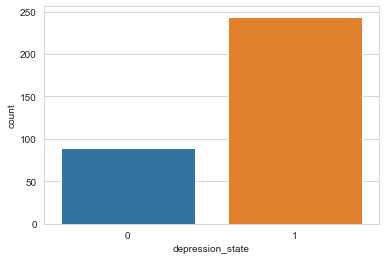

In [3]:
sns.set_style('whitegrid')
sns.countplot(x = 'depression_state', data = data)

<AxesSubplot:xlabel='anxiety_state', ylabel='count'>

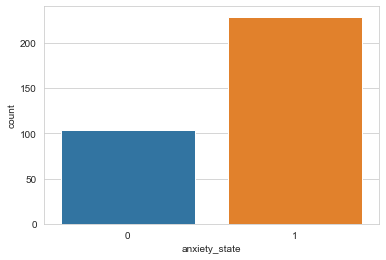

In [4]:
sns.set_style('whitegrid')
sns.countplot(x = 'anxiety_state', data = data)

<AxesSubplot:xlabel='stress_state', ylabel='count'>

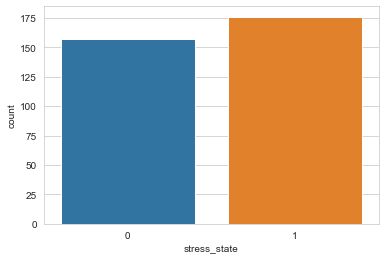

In [5]:
sns.set_style('whitegrid')
sns.countplot(x = 'stress_state', data = data)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
 

data['Age'] = le.fit_transform(data['Age'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Education'] = le.fit_transform(data['Education'])
data['Living_Area'] = le.fit_transform(data['Living_Area'])
data['Marital_Status'] = le.fit_transform(data['Marital_Status'])
data['Family_Type'] = le.fit_transform(data['Family_Type'])
data['Coronavirus'] = le.fit_transform(data['Coronavirus'])

In [7]:
depression = data[['3d', '5d', '10d', '13d', '16d', '17d','21d','depression_state']]
anxiety = data[['2a', '4a', '7a', '9a', '15a', '19a','20a','anxiety_state']]
stress = data[['1s', '6s', '8s', '11s', '12s', '14s','18s','stress_state']]

In [8]:
depression_correlation=depression.corr()
print(depression_correlation['depression_state'].sort_values(ascending=False))

depression_state    1.000000
21d                 0.581558
16d                 0.577815
10d                 0.573902
13d                 0.553715
17d                 0.550374
5d                  0.515589
3d                  0.480218
Name: depression_state, dtype: float64


In [9]:
depression_correlation

,3d,5d,10d,13d,16d,17d,21d,depression_state
3d,1.000000,0.488061,0.490315,0.518150,0.406966,0.457194,0.441069,0.480218
5d,0.488061,1.000000,0.491258,0.420145,0.383307,0.311201,0.388016,0.515589
10d,0.490315,0.491258,1.000000,0.613740,0.592182,0.522695,0.531368,0.573902
13d,0.518150,0.420145,0.613740,1.000000,0.543939,0.488379,0.463244,0.553715
16d,0.406966,0.383307,0.592182,0.543939,1.000000,0.499337,0.467367,0.577815
17d,0.457194,0.311201,0.522695,0.488379,0.499337,1.000000,0.575668,0.550374
21d,0.441069,0.388016,0.531368,0.463244,0.467367,0.575668,1.000000,0.581558
depression_state,0.480218,0.515589,0.573902,0.553715,0.577815,0.550374,0.581558,1.000000


<AxesSubplot:>

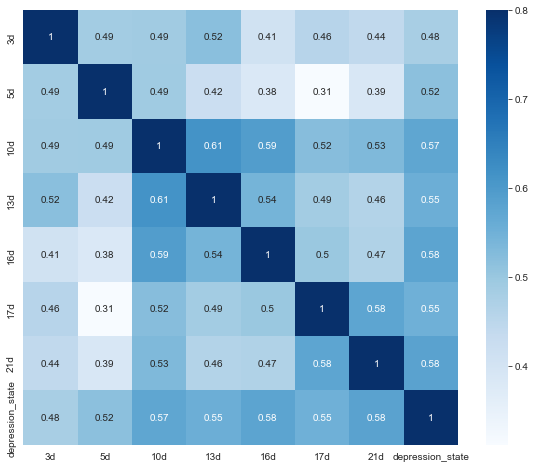

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(depression_correlation,annot=True,cmap='Blues',square=True,vmax=0.8)

In [11]:
anxiety_correlation=anxiety.corr()
print(anxiety_correlation['anxiety_state'].sort_values(ascending=False))

anxiety_state    1.000000
15a              0.616196
20a              0.573591
9a               0.568289
19a              0.550029
4a               0.502262
7a               0.494723
2a               0.461960
Name: anxiety_state, dtype: float64


<AxesSubplot:>

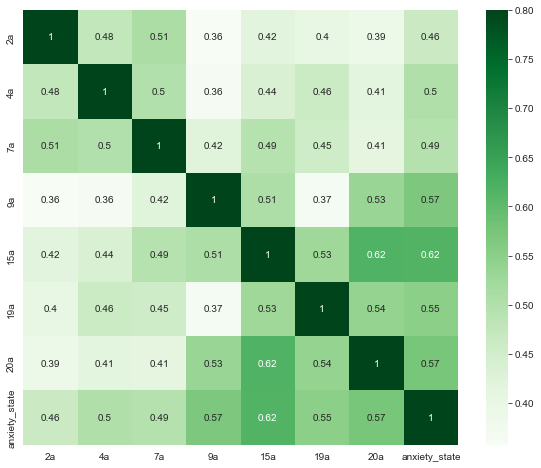

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(anxiety_correlation,annot=True,cmap='Greens',square=True,vmax=0.8)

In [13]:
stress_correlation=stress.corr()
print(stress_correlation['stress_state'].sort_values(ascending=False))

stress_state    1.000000
12s             0.649305
8s              0.646451
18s             0.613897
11s             0.600213
14s             0.594243
6s              0.538343
1s              0.469080
Name: stress_state, dtype: float64


<AxesSubplot:>

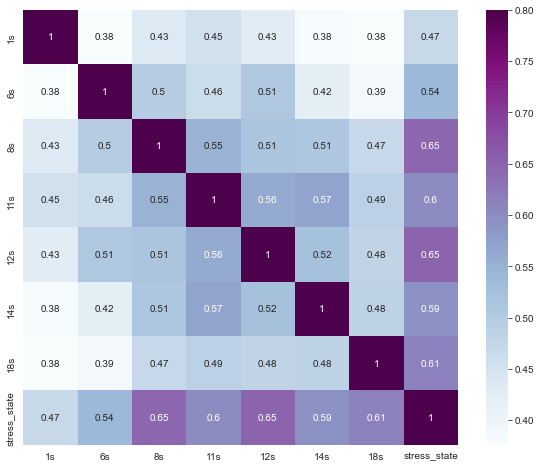

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(stress_correlation,annot=True,cmap='BuPu',square=True,vmax=0.8)

In [15]:
X_depression = data[['3d', '5d', '10d', '13d', '16d', '17d','21d']]
Y_depression = data['depression_state']


X_anxiety = data[['2a', '4a', '7a', '9a', '15a', '19a','20a']]
Y_anxiety = data['anxiety_state']


X_stress = data[['1s', '6s', '8s', '11s', '12s', '14s','18s']]
Y_stress = data['stress_state']

In [16]:
from sklearn.model_selection import train_test_split


X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_depression, Y_depression, test_size = 0.2, random_state = 42)
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_anxiety, Y_anxiety, test_size = 0.2, random_state = 42)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_stress, Y_stress, test_size = 0.2, random_state = 42)


print("Train Set: ", X_train_d.shape, y_train_d.shape)
print("Test Set: ", X_test_d.shape, y_test_d.shape)

Train Set:  (266, 7) (266,)
Test Set:  (67, 7) (67,)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [18]:
RANDOM_STATE = 42

model_params = {
    
    'SVC': {
        'model': SVC(random_state=RANDOM_STATE),
        'params' : {
            'kernel': ['rbf'],
            'C': [0.1, 1, 10, 100],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                      
        }  
    },
    
    
    'random_forest': {
        'model': RandomForestClassifier(max_depth=7, min_samples_split=5, min_samples_leaf=5, random_state=RANDOM_STATE),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    
    
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    
    
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    
    'K-nearest neighbors': {
        'model': KNeighborsClassifier(),
        'params': {}
    },
    
    
    'Gradient boosting classifiers': {
        'model': GradientBoostingClassifier(
                   learning_rate=0.005, n_estimators=30, random_state=RANDOM_STATE),
        'params': {
            'learning_rate': [0.001, 0.01, 0.005],
            'n_estimators': [10,20,30]
        }
    },
    
    
    'decision_tree': {
        'model': DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }
    
}

In [19]:
from sklearn.model_selection import GridSearchCV

scores_d = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_d, y_train_d)
    scores_d.append({
        'Model': model_name,
        'Accuracy': clf.best_score_,
        'best_params': clf.best_params_
    })
    
result_d = pd.DataFrame(scores_d,columns=['Model','Accuracy','best_params'])

result_d

,Model,Accuracy,best_params
0,SVC,1.000000,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}"
1,random_forest,0.947310,{'n_estimators': 10}
2,logistic_regression,0.996226,{'C': 10}
3,naive_bayes_multinomial,0.733124,{}
4,K-nearest neighbors,0.984976,{}
5,Gradient boosting classifiers,0.748148,"{'learning_rate': 0.001, 'n_estimators': 10}"
6,decision_tree,0.868344,{'criterion': 'entropy'}


In [20]:
classifierDep = SVC(C=100,gamma=0.01, kernel='rbf', random_state=RANDOM_STATE)
classifierDep.fit(X_train_d, y_train_d)

SVC(C=100, gamma=0.01, random_state=42)

In [21]:
y_pred_d = classifierDep.predict(X_test_d)
print(f"Train Accuracy for Depressoion is: {round(classifierDep.score(X_train_d, y_train_d)*100,2)}%")
print(f"Test Accuracy Depressoion is : {round(classifierDep.score(X_test_d, y_test_d)*100,2)}%")
print('Cross Validation Depressoion Score:',round(np.mean(cross_val_score(classifierDep, X_train_d, y_train_d, cv = 5)),3))

Train Accuracy for Depressoion is: 100.0%
Test Accuracy Depressoion is : 98.51%
Cross Validation Depressoion Score: 1.0


In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_d,y_pred_d))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.98      1.00      0.99        45

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.98        67



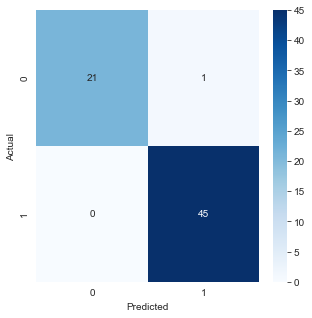

In [37]:
conf_mat = confusion_matrix(y_test_d,y_pred_d)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

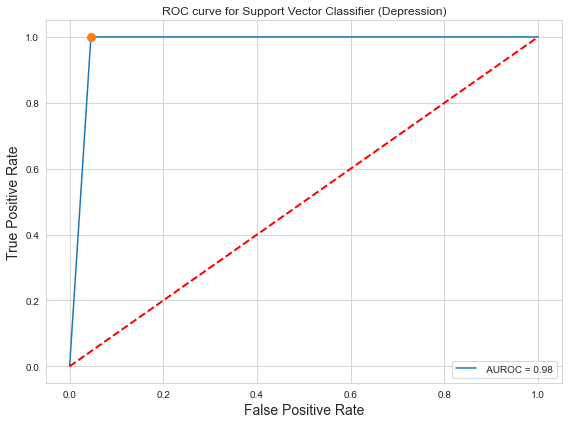

In [24]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))

fpr, tpr, thresholds_roc = roc_curve(y_test_d,y_pred_d)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Support Vector Classifier (Depression)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

In [25]:
scores_a = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_a, y_train_a)
    scores_a.append({
        'Model': model_name,
        'Accuracy': clf.best_score_,
        'best_params': clf.best_params_
    })
    
result_a = pd.DataFrame(scores_a,columns=['Model','Accuracy','best_params'])

result_a

,Model,Accuracy,best_params
0,SVC,1.000000,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}"
1,random_forest,0.951083,{'n_estimators': 10}
2,logistic_regression,0.992453,{'C': 1}
3,naive_bayes_multinomial,0.639064,{}
4,K-nearest neighbors,0.954997,{}
5,Gradient boosting classifiers,0.676730,"{'learning_rate': 0.001, 'n_estimators': 10}"
6,decision_tree,0.849616,{'criterion': 'gini'}


In [26]:
classifierAnx = SVC(C=1,gamma=1, kernel='rbf', random_state=RANDOM_STATE)
classifierAnx.fit(X_train_a, y_train_a)

SVC(C=1, gamma=1, random_state=42)

In [27]:
y_pred_a = classifierAnx.predict(X_test_a)
print(f"Train Accuracy for Anxiety is: {round(classifierAnx.score(X_train_a, y_train_a)*100,2)}%")
print(f"Test Accuracy Anxiety is : {round(classifierAnx.score(X_test_a, y_test_a)*100,2)}%")
print('Cross Validation Anxiety Score:',round(np.mean(cross_val_score(classifierAnx, X_train_a, y_train_a, cv = 5)),3))

Train Accuracy for Anxiety is: 100.0%
Test Accuracy Anxiety is : 98.51%
Cross Validation Anxiety Score: 0.947


In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_a,y_pred_a))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.98      1.00      0.99        49

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



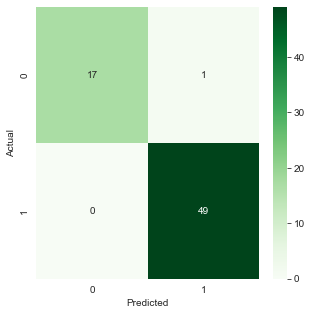

In [38]:
conf_mat = confusion_matrix(y_test_a,y_pred_a)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Greens")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

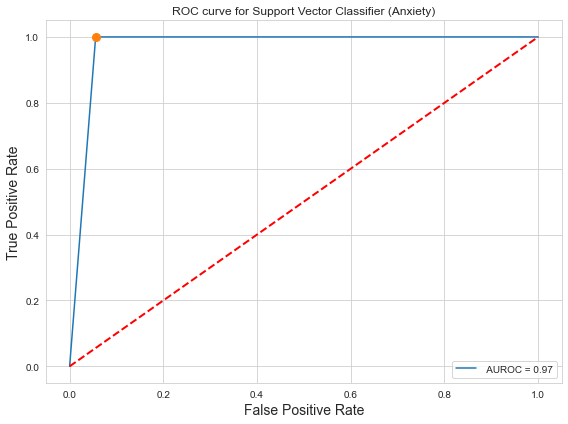

In [30]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))

fpr, tpr, thresholds_roc = roc_curve(y_test_a,y_pred_a)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Support Vector Classifier (Anxiety)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

In [31]:
scores_s = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_s, y_train_s)
    scores_s.append({
        'Model': model_name,
        'Accuracy': clf.best_score_,
        'best_params': clf.best_params_
    })
    
result_s = pd.DataFrame(scores_s,columns=['Model','Accuracy','best_params'])

result_s

,Model,Accuracy,best_params
0,SVC,1.000000,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}"
1,random_forest,0.924598,{'n_estimators': 10}
2,logistic_regression,0.988679,{'C': 10}
3,naive_bayes_multinomial,0.522781,{}
4,K-nearest neighbors,0.921034,{}
5,Gradient boosting classifiers,0.894759,"{'learning_rate': 0.01, 'n_estimators': 30}"
6,decision_tree,0.864500,{'criterion': 'gini'}


In [32]:
classifierStr = SVC(C=1,gamma=0.001, kernel='rbf', random_state=RANDOM_STATE)
classifierStr.fit(X_train_s, y_train_s)

SVC(C=1, gamma=0.001, random_state=42)

In [33]:
y_pred_s = classifierStr.predict(X_test_s)
print(f"Train Accuracy for Stress is: {round(classifierStr.score(X_train_s, y_train_s)*100,2)}%")
print(f"Test Accuracy Stress is : {round(classifierStr.score(X_test_s, y_test_s)*100,2)}%")
print('Cross Validation Stress Score:',round(np.mean(cross_val_score(classifierStr, X_train_s, y_train_s, cv = 5)),3))

Train Accuracy for Stress is: 98.87%
Test Accuracy Stress is : 98.51%
Cross Validation Stress Score: 0.948


In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_s,y_pred_s))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.97      0.99        35

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67



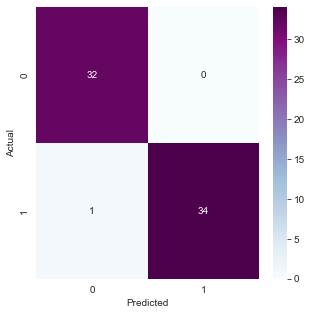

In [39]:
conf_mat = confusion_matrix(y_test_s,y_pred_s)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="BuPu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

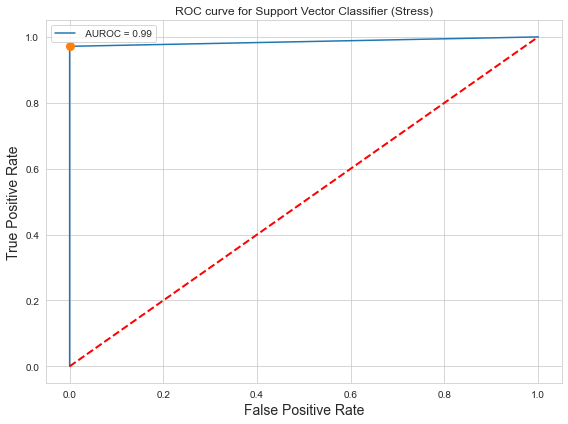

In [36]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))

fpr, tpr, thresholds_roc = roc_curve(y_test_s,y_pred_s)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Support Vector Classifier (Stress)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()